In [2]:
from IPython.display import HTML, display
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
import pandas as pd
import numpy as np
import scipy as sc

housing_price_index = pd.read_csv('monthly-hpi.csv')
unemployment = pd.read_csv('unemployment-macro.csv')
federal_funds_rate = pd.read_csv('fed_funds.csv')
shiller = pd.read_csv('shiller.csv')
gross_domestic_product = pd.read_csv('gdp.csv')


In [4]:
# merge dataframes into single dataframe by date
df = (shiller.merge(housing_price_index, on='date')
    .merge(unemployment, on='date')
    .merge(federal_funds_rate, on='date')
    .merge(gross_domestic_product, on='date'))


In [5]:
df.head

<bound method NDFrame.head of          date    sp500  consumer_price_index  long_interest_rate  \
0    1/1/2011  1282.62                220.22                3.39   
1    4/1/2011  1331.51                224.91                3.46   
2    7/1/2011  1325.19                225.92                3.00   
3   10/1/2011  1207.22                226.42                2.15   
4    1/1/2012  1300.58                226.66                1.97   
5    4/1/2012  1386.43                230.09                2.05   
6    7/1/2012  1359.78                229.10                1.53   
7   10/1/2012  1437.82                231.32                1.75   
8    1/1/2013  1480.40                230.28                1.91   
9    4/1/2013  1570.70                232.53                1.76   
10   7/1/2013  1668.68                233.60                2.58   
11  10/1/2013  1720.03                233.55                2.62   
12   1/1/2014  1822.36                233.92                2.86   
13   4/1/2014  186

In [6]:
df.describe()

,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
count,23.000000,23.000000,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,1697.955652,232.821739,2.26913,204.955652,13.004348,5602.521739,2317.173913,7088.217391,8.495652,52.917391,0.145217,5914.082609,63.265217,198.421739,15795.756522
std,322.596751,5.405947,0.54516,19.364036,2.267052,1801.301143,294.338187,248.798742,1.316496,4.059854,0.093121,176.572817,0.561337,7.786875,571.226411
min,1207.220000,220.220000,1.50000,179.130000,9.700000,3175.000000,1715.000000,6816.000000,6.500000,47.600000,0.070000,5745.400000,62.500000,182.600000,14881.300000
25%,1373.105000,229.595000,1.89500,187.840000,11.050000,3912.000000,2137.500000,6895.500000,7.500000,49.200000,0.090000,5773.600000,62.800000,192.350000,15371.600000
50%,1720.030000,233.600000,2.09000,205.440000,13.600000,5807.000000,2347.000000,7007.000000,8.200000,53.600000,0.120000,5841.400000,62.900000,202.500000,15747.000000
75%,1998.955000,237.250000,2.60000,218.645000,14.700000,7027.500000,2497.500000,7308.000000,9.700000,55.500000,0.155000,5970.850000,63.700000,203.600000,16321.600000
max,2148.900000,240.650000,3.46000,241.590000,16.200000,8393.000000,2809.000000,7577.000000,10.900000,60.100000,0.390000,6307.500000,64.200000,208.300000,16727.000000


In [7]:
df['housing_price_index'].describe()#housing_price_index is dependent variable


count     23.000000
mean     204.955652
std       19.364036
min      179.130000
25%      187.840000
50%      205.440000
75%      218.645000
max      241.590000
Name: housing_price_index, dtype: float64

In [8]:
df['long_interest_rate'].describe()


count    23.00000
mean      2.26913
std       0.54516
min       1.50000
25%       1.89500
50%       2.09000
75%       2.60000
max       3.46000
Name: long_interest_rate, dtype: float64

In [9]:
df['total_unemployed'].describe()


count    23.000000
mean     13.004348
std       2.267052
min       9.700000
25%      11.050000
50%      13.600000
75%      14.700000
max      16.200000
Name: total_unemployed, dtype: float64

In [10]:
df['gross_domestic_product'].describe()

count       23.000000
mean     15795.756522
std        571.226411
min      14881.300000
25%      15371.600000
50%      15747.000000
75%      16321.600000
max      16727.000000
Name: gross_domestic_product, dtype: float64

-0.3538174823019483 0.09766110342992321


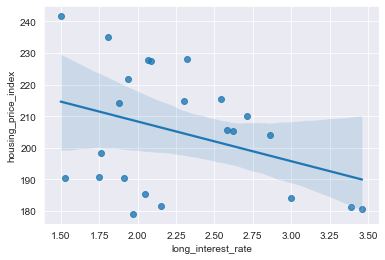

In [11]:
sns.regplot(x='long_interest_rate',y='housing_price_index', data=df)
Pearson_coef_LIR,p_value_LIR = sc.stats.pearsonr(df['long_interest_rate'],df['housing_price_index'])
print(Pearson_coef_LIR,p_value_LIR)

-0.9755166787221856 2.7118044781654972e-15


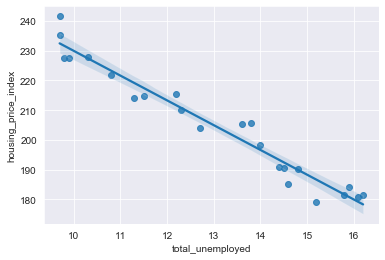

In [12]:
sns.regplot(x='total_unemployed',y='housing_price_index', data=df)
Pearson_coef_TU,p_value_TU = sc.stats.pearsonr(df['total_unemployed'],df['housing_price_index'])
print(Pearson_coef_TU,p_value_TU)

0.9769601538044199 1.4417902242942918e-15


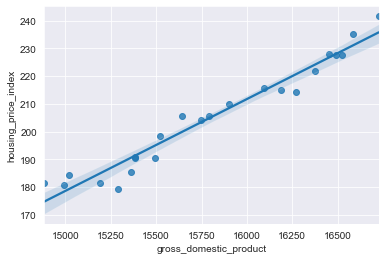

In [13]:
sns.regplot(x='gross_domestic_product',y='housing_price_index', data=df)
Pearson_coef_GDP,p_value_GDP = sc.stats.pearsonr(df['gross_domestic_product'],df['housing_price_index'])
print(Pearson_coef_GDP,p_value_GDP)

In [14]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
housing_model = ols("housing_price_index ~ total_unemployed",
data=df).fit()
# summarize our model
housing_model_summary = housing_model.summary()
# convert our table to HTML and add colors to headers for explanatory purposes
# THIS HTML CODE IS A STYLISTIC CHOICE NOT A NECESSITY
HTML(
(housing_model_summary
 .as_html()
 .replace('<th> Adj. R-squared: </th>', '<thstyle="background-color:#aec7e8;"> Adj. R-squared: </th>')
 .replace('<th>coef</th>', '<th style="backgroundcolor:#ffbb78;">coef</th>')
 .replace('<th>std err</th>', '<th style="backgroundcolor:#c7e9c0;">std err</th>')
 .replace('<th>P>|t|</th>', '<th style="backgroundcolor:#bcbddc;">P>|t|</th>')
 .replace('<th>[0.025</th> <th>0.975]</th>', '<thstyle="background-color:#ff9896;">[0.025</th> <thstyle="background-color:#ff9896;">0.975]</th>'))
)


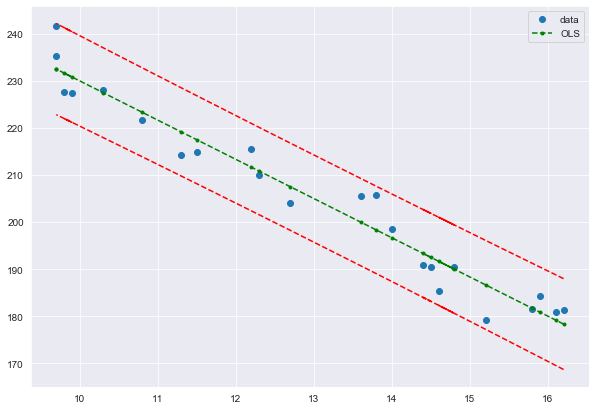

In [20]:
# predictor variable (x) and dependent variable (y)
x = df[['total_unemployed']]
y = df[['housing_price_index']]
# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for
# plotting but need it as a placeholder
# wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)
fig, ax = plt.subplots(figsize=(10,7))
# plot the dots
# 'o' specifies the shape (circle), we can also use 'd'(diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")
# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")
# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')
# plot legend
ax.legend(loc='best');
